In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### National analysis

#### load dataset

In [2]:
df_naz = pd.read_csv('../dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv').set_index('data').drop('stato',1)
df_naz.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,,,
2020-03-05 18:00:00,1790,351,2141,1155,3296,590,414,148,3858,32362
2020-03-06 18:00:00,2394,462,2856,1060,3916,620,523,197,4636,36359
2020-03-07 18:00:00,2651,567,3218,1843,5061,1145,589,233,5883,42062
2020-03-08 18:00:00,3557,650,4207,2180,6387,1326,622,366,7375,49937
2020-03-09 18:00:00,4316,733,5049,2936,7985,1598,724,463,9172,53826


In [3]:
df_naz['delta_totale_casi'] = df_naz['totale_casi'].diff()
df_naz['delta_dimessi_guariti'] = df_naz['dimessi_guariti'].diff()
df_naz['delta_deceduti'] = df_naz['deceduti'].diff()
df_naz['delta%_totale_casi'] = df_naz['totale_casi'].diff()/df_naz['totale_casi'].shift()
df_naz['delta%_dimessi_guariti'] = df_naz['dimessi_guariti'].diff()/df_naz['dimessi_guariti'].shift()
df_naz['delta%_deceduti'] = df_naz['deceduti'].diff()/df_naz['deceduti'].shift()

#### national daily data

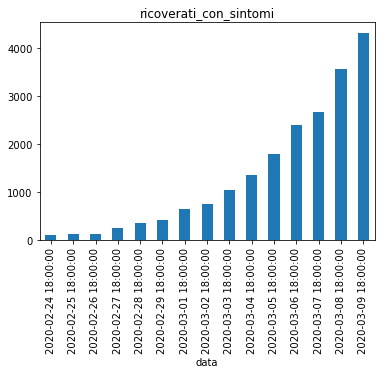

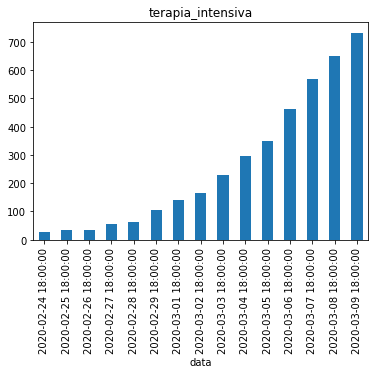

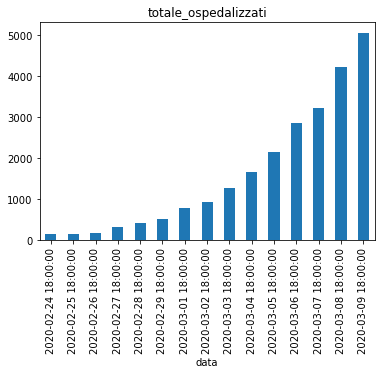

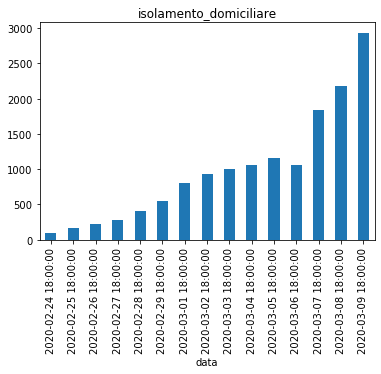

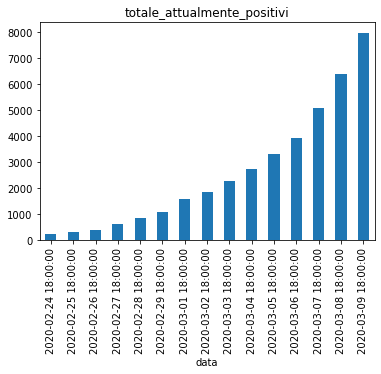

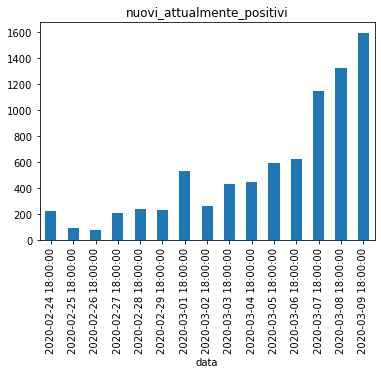

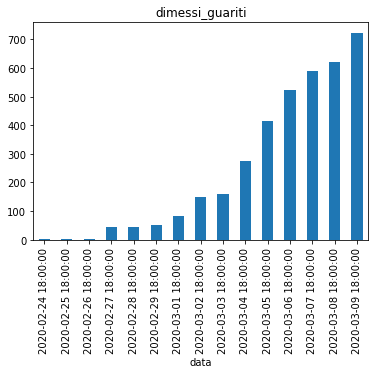

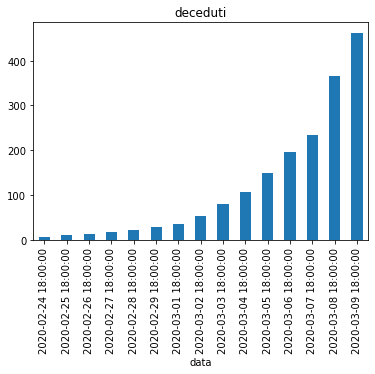

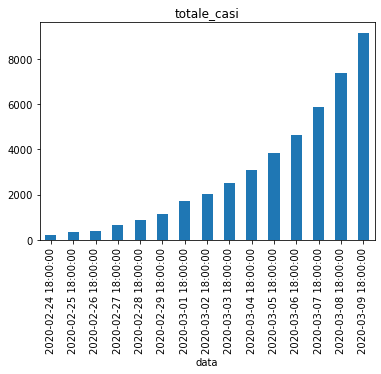

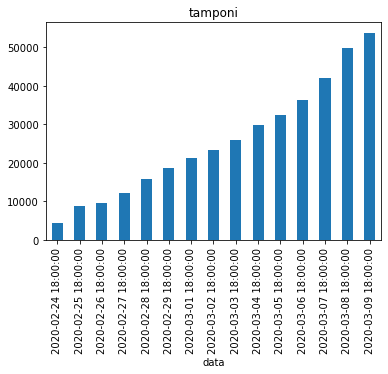

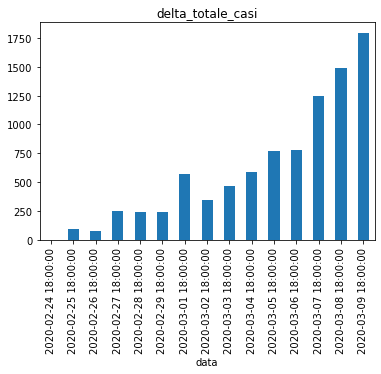

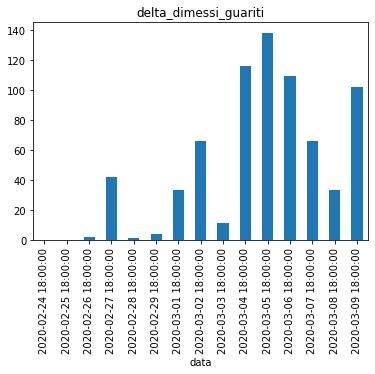

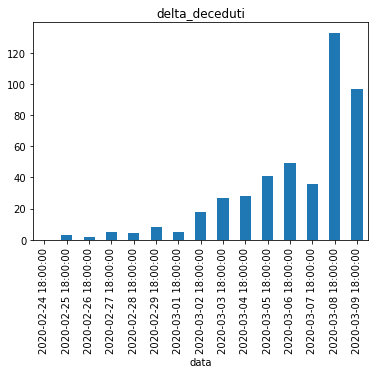

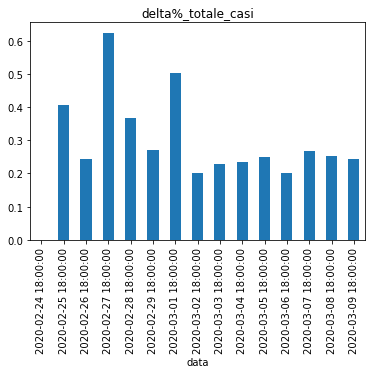

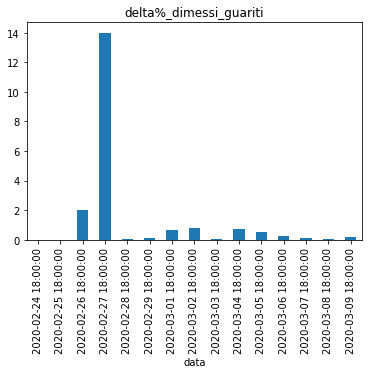

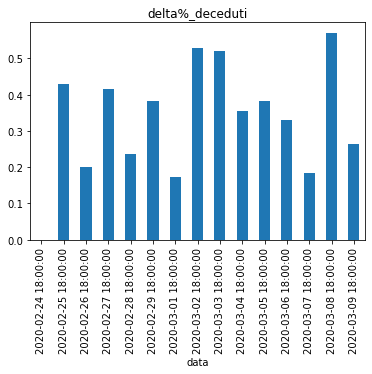

In [4]:
for col in df_naz.columns:
    plt.figure()
    df_naz[col].plot(kind='bar', title=col)

#### national daily variations

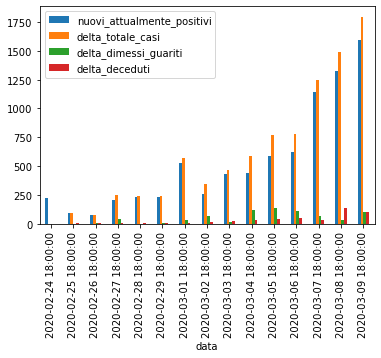

In [5]:
df_naz[['nuovi_attualmente_positivi', 'delta_totale_casi','delta_dimessi_guariti','delta_deceduti']].plot(kind='bar')

### regional analysis

#### load data

In [6]:
df_reg = pd.read_csv('../dati-regioni/dpc-covid19-ita-regioni.csv')
df_reg.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
310,2020-03-09 18:00:00,ITA,9,Toscana,43.769231,11.255889,107,9,116,90,206,41,1,1,208,2018
311,2020-03-09 18:00:00,ITA,4,Trento,46.068935,11.121231,10,2,12,21,33,10,0,0,33,267
312,2020-03-09 18:00:00,ITA,10,Umbria,43.106758,12.388247,4,2,6,22,28,2,0,0,28,183
313,2020-03-09 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,4,0,4,11,15,6,0,0,15,67
314,2020-03-09 18:00:00,ITA,5,Veneto,45.434905,12.338452,186,51,237,457,694,71,30,20,744,15956


In [7]:
df_reg['delta_totale_casi'] = df_reg['totale_casi'].diff()
df_reg['delta_dimessi_guariti'] = df_reg['dimessi_guariti'].diff()
df_reg['delta_deceduti'] = df_reg['deceduti'].diff()
df_reg['delta%_totale_casi'] = df_reg['totale_casi'].diff()/df_reg['totale_casi'].shift()
df_reg['delta%_dimessi_guariti'] = df_reg['dimessi_guariti'].diff()/df_reg['dimessi_guariti'].shift()
df_reg['delta%_deceduti'] = df_reg['deceduti'].diff()/df_reg['deceduti'].shift()

In [8]:
available_data = ['ricoverati_con_sintomi','terapia_intensiva','totale_ospedalizzati',
                  'isolamento_domiciliare','totale_attualmente_positivi','nuovi_attualmente_positivi',
                  'dimessi_guariti','deceduti','totale_casi','tamponi']

#### daily data for top regions

<Figure size 432x288 with 0 Axes>

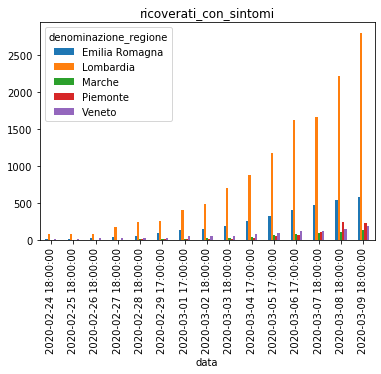

<Figure size 432x288 with 0 Axes>

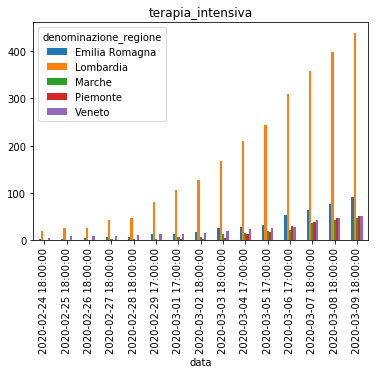

<Figure size 432x288 with 0 Axes>

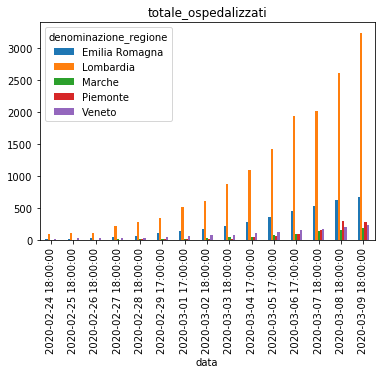

<Figure size 432x288 with 0 Axes>

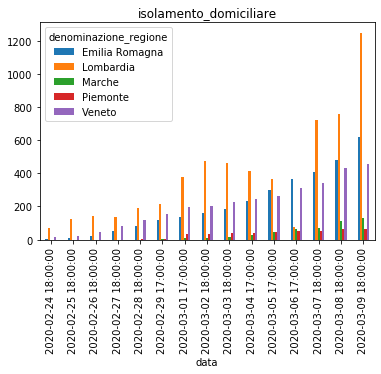

<Figure size 432x288 with 0 Axes>

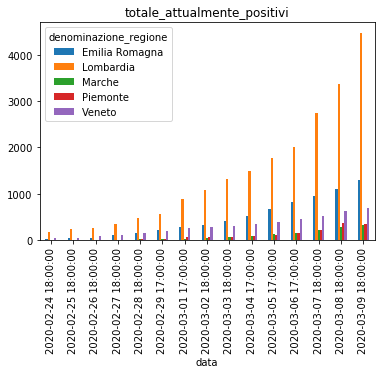

<Figure size 432x288 with 0 Axes>

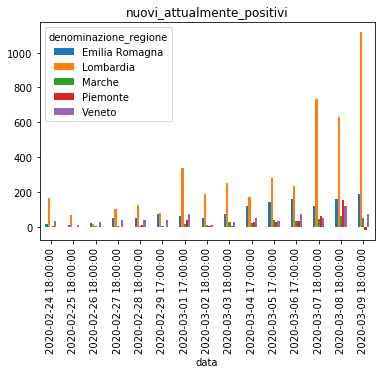

<Figure size 432x288 with 0 Axes>

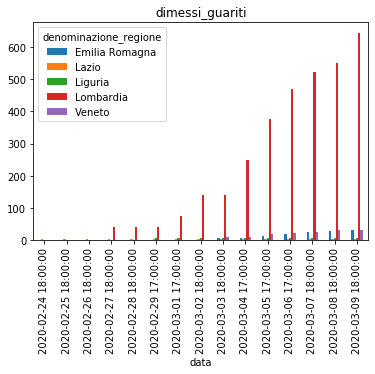

<Figure size 432x288 with 0 Axes>

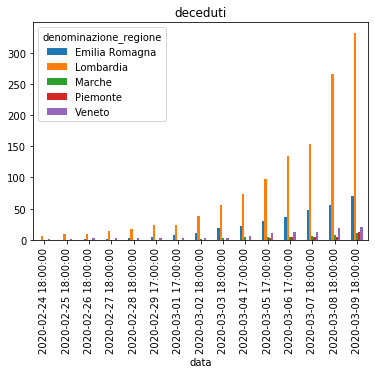

<Figure size 432x288 with 0 Axes>

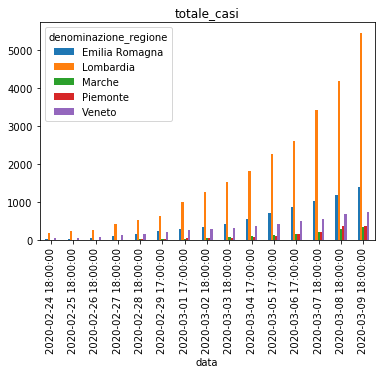

<Figure size 432x288 with 0 Axes>

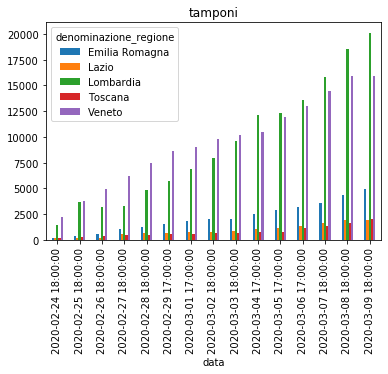

In [18]:
num_regions_to_show = 5
for col in available_data:
    plt.figure()
    top_regions = df_reg.groupby('denominazione_regione').sum().sort_values(by=col, ascending=False)[:num_regions_to_show].index
    df_regions = df_reg.set_index('data')[df_reg.set_index('data')['denominazione_regione'].isin(top_regions)]
    df_regions = df_regions.pivot_table(index=df_regions.index,columns='denominazione_regione', values=col)
    df_regions.plot(kind='bar', title=col, legend=True)

#### daily variations for top regions

<Figure size 432x288 with 0 Axes>

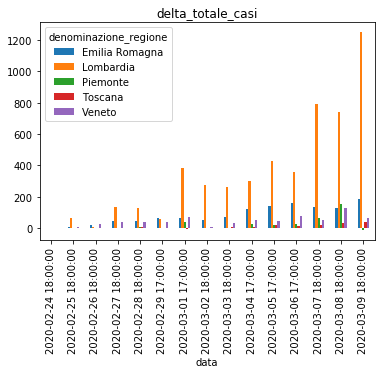

<Figure size 432x288 with 0 Axes>

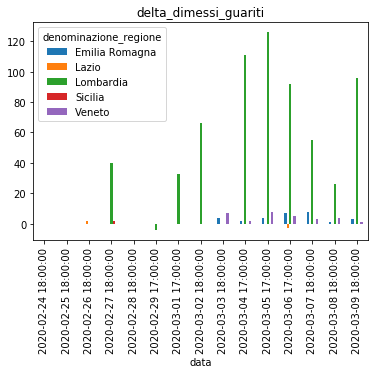

<Figure size 432x288 with 0 Axes>

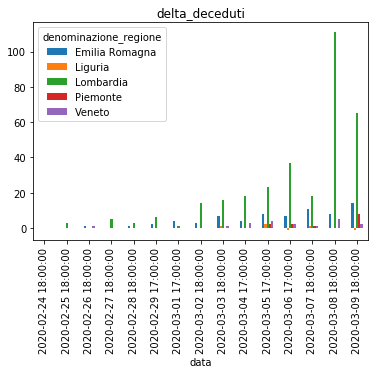

<Figure size 432x288 with 0 Axes>

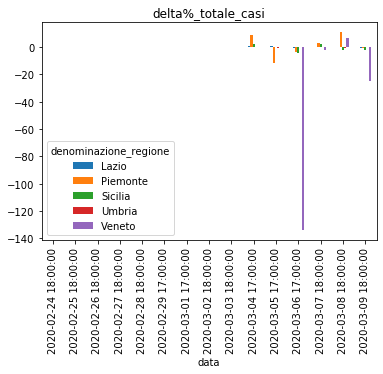

<Figure size 432x288 with 0 Axes>

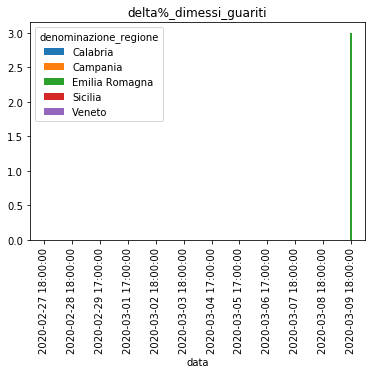

<Figure size 432x288 with 0 Axes>

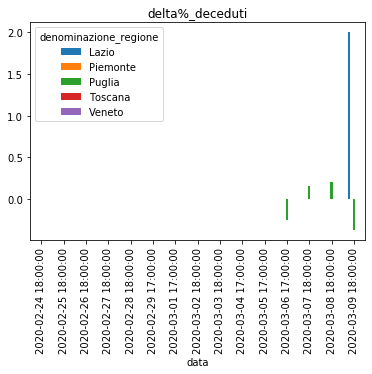

In [19]:
for col in df_reg.columns:
    if 'delta' in col:
        plt.figure()
        top_regions = df_reg.groupby('denominazione_regione').sum().sort_values(by=col, ascending=False)[:num_regions_to_show].index
        df_regions = df_reg.set_index('data')[df_reg.set_index('data')['denominazione_regione'].isin(top_regions)]
        df_regions = df_regions.pivot_table(index=df_regions.index,columns='denominazione_regione', values=col)
        df_regions.diff().plot(kind='bar', title=col, legend=True)                

#### regional evolution of total infections during time (press 'play' on sliderbar)

In [20]:
colormap = 'totale_casi'
fig = px.density_mapbox(df_reg, lat='lat', lon='long', z=colormap, radius=10, 
                        hover_name='denominazione_regione',
                        zoom=3,  height=800,
                        animation_frame='data',
                        mapbox_style="stamen-terrain",
                       title='regional evolution of total infections during time')
fig.show()

#### regional evolution of intense treatment during time (press 'play' on sliderbar)

In [21]:
colormap = 'terapia_intensiva'
fig = px.density_mapbox(df_reg, lat='lat', lon='long', z=colormap, radius=10, 
                        hover_name='denominazione_regione',
                        zoom=3,  height=800,
                        animation_frame='data',
                        mapbox_style="stamen-terrain",
                        title='regional evolution of intense treatment during time')
fig.show()

### province analysis

#### load data

In [22]:
df_prov = pd.read_csv('../dati-province/dpc-covid19-ita-province.csv').set_index('data').drop('stato',1)
df_prov.tail()

,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
data,,,,,,,,
2020-03-09 18:00:00,5,Veneto,26,Treviso,TV,45.667546,12.245074,136
2020-03-09 18:00:00,5,Veneto,27,Venezia,VE,45.434905,12.338452,130
2020-03-09 18:00:00,5,Veneto,23,Verona,VR,45.438390,10.993527,73
2020-03-09 18:00:00,5,Veneto,24,Vicenza,VI,45.547497,11.545971,53
2020-03-09 18:00:00,5,Veneto,999,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,43


#### daily data for total infections for most affected provinces

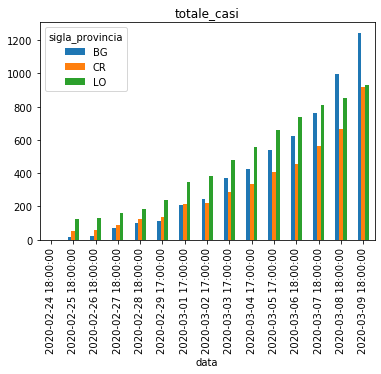

In [23]:
col = 'totale_casi'
num_prov_to_show = 3
top_province = df_prov.groupby('denominazione_provincia').sum().sort_values(by=col, ascending=False)[:num_prov_to_show].index #['Lodi', 'Milano']
df_province = df_prov[df_prov['denominazione_provincia'].isin(top_province)]
df_province = df_province.pivot_table(index=df_province.index,columns='sigla_provincia', values=col)
df_province.plot(kind='bar', title=col, legend=True)

#### daily variations of total infections for most affected provinces

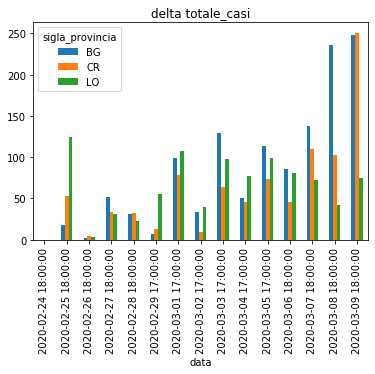

In [24]:
df_province.diff().plot(kind='bar', title='delta '+col, legend=True)

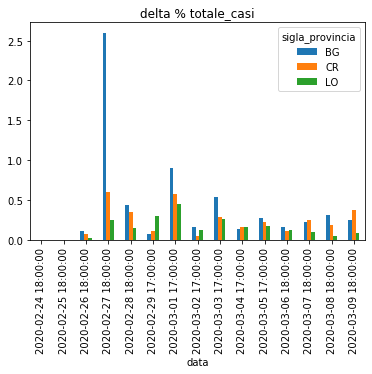

In [25]:
(df_province.diff()/df_province.shift()).plot(kind='bar', title='delta % '+col, legend=True)

#### geographical diffusion on all provinces during time

In [26]:
colormap = 'totale_casi'
fig = px.density_mapbox(df_prov, lat='lat', lon='long', z=colormap, radius=10, 
                        hover_name='denominazione_provincia',
                        zoom=5,  height=800,
                        animation_frame=df_prov.index,
                        mapbox_style="stamen-terrain",
                        title = 'geographical diffusion on all provinces during time')
fig.show()